## Домашнее задание

Вариант 2. (сложный)
- реализовать нейронную сеть или стек из сверток (Concatenate) на сifar10.
- оценить рост точности при увеличении ширины сети (больше ядер), больше нитей.
- оценить рост точности при увеличении глубины сети (больше слоев)

In [4]:
from tensorflow.keras.layers import Dense, Flatten, Concatenate
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from operator import itemgetter, attrgetter, methodcaller
from tqdm import tqdm

In [5]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [6]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [7]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 5

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#### Реализовать нейронную сеть или стек из сверток (Concatenate) на сifar10.

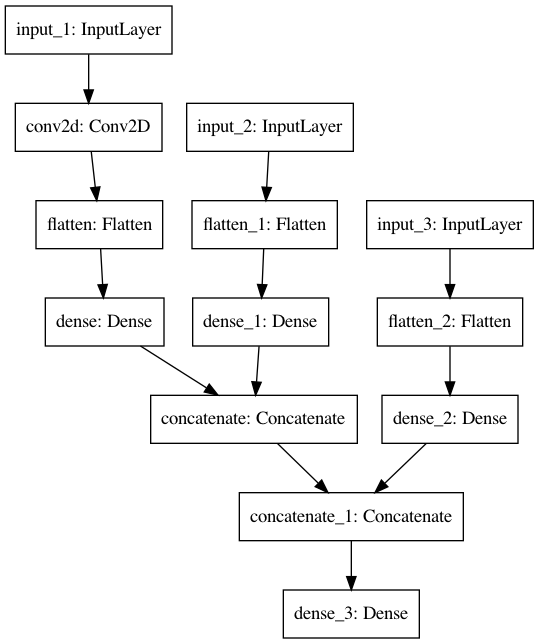

In [5]:
first_input = Input(shape=(x_train.shape[1:]))
x11= Conv2D(10,3,activation='relu')(first_input)
x11= Flatten()(x11)
first_dense = Dense(1, )(x11)

second_input = Input(shape=(x_train.shape[1:]))
x22= Flatten()(second_input)
second_dense = Dense(1, )(x22)

merge_one = Concatenate( )([first_dense, second_dense])

third_input = Input(shape=(x_train.shape[1:]))
x33= Flatten()(third_input)
x33 = Dense(1, )(x33)
merge_two = Concatenate(axis=1)([merge_one, x33])
merge_two=Dense(10, activation='softmax')(merge_two)


model_stek = Model(inputs=[first_input, second_input, third_input], outputs=merge_two)
ada_grad = tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model_stek.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


plot_model(model_stek,'model_stek.png')



In [6]:
model_stek.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 30, 30, 10)   280         input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 9000)         0           conv2d[0][0]                     
______________________________________________________________________________________________

In [7]:
ist = model_stek.fit([x_train,x_train,x_train],y_train, epochs = 5, validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 8s 6ms/step - loss: 3.3901 - accuracy: 0.1790 - val_loss: 1.9785 - val_accuracy: 0.2503
Epoch 2/5
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9740 - accuracy: 0.2443 - val_loss: 1.9630 - val_accuracy: 0.2530
Epoch 3/5
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9474 - accuracy: 0.2535 - val_loss: 1.9681 - val_accuracy: 0.2529
Epoch 4/5
1250/1250 [==============================] - 6s 4ms/step - loss: 1.9430 - accuracy: 0.2554 - val_loss: 1.9619 - val_accuracy: 0.2483
Epoch 5/5
1250/1250 [==============================] - 6s 4ms/step - loss: 1.9301 - accuracy: 0.2559 - val_loss: 1.9528 - val_accuracy: 0.2587


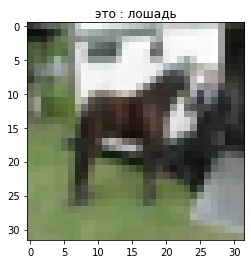

In [8]:
N = 20

plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()

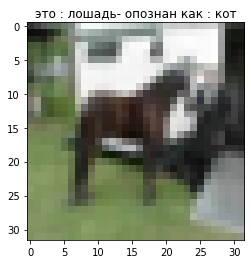

In [9]:
N = 20
xt = x_test[N:N+1][:,:,:]
y_p=model_stek.predict([xt,xt,xt])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

In [10]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [11]:
y_train_true = np.argmax(y_train,axis=1)
y_train_pred = np.argmax(model_stek.predict([x_train,x_train,x_train]),axis=1)
    
y_test_true = np.argmax(y_test,axis=1)
y_test_pred = np.argmax(model_stek.predict([x_test,x_test,x_test]),axis=1)
    
get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.26      0.61      0.36      5000
           1       0.39      0.34      0.36      5000
           2       0.15      0.15      0.15      5000
           3       0.16      0.08      0.11      5000
           4       0.23      0.27      0.25      5000
           5       0.20      0.26      0.23      5000
           6       0.31      0.35      0.32      5000
           7       0.17      0.04      0.07      5000
           8       0.33      0.23      0.27      5000
           9       0.41      0.27      0.33      5000

    accuracy                           0.26     50000
   macro avg       0.26      0.26      0.25     50000
weighted avg       0.26      0.26      0.25     50000

TEST

              precision    recall  f1-score   support

           0       0.25      0.60      0.36      1000
           1       0.40      0.32      0.36      1000
           2       0.12      0.12      0.12      1000
           

#### Оценить рост точности при увеличении ширины сети (больше ядер), больше нитей.

In [2]:
def concat_nn(x_train, y_train, x_test, y_test, n_neurons = 32, kernel_size = 3, n_thread = 2, n_layers = 2, 
              pool_kernel = 2, strade = 2, epochs = 5, batch_size = 32):
    size = x_train.shape[1:]
    sz_x_train = []
    sz_x_test = []
    for sz in range(n_thread):
        sz_x_train.append(x_train)
        sz_x_test.append(x_test)
    inputs = []
    dense = []
    for trd in range(n_thread):
        inpt = Input(shape=(size))
        inputs.append(inpt)
        xc = []
        for core in range(n_layers):
            xc.append(MaxPooling2D(pool_size=(pool_kernel,pool_kernel), strides=strade)(Conv2D(n_neurons,kernel_size,activation='relu')(inpt)))
        x1 = Conv2D(n_neurons,kernel_size,activation='relu')(xc[n_layers-1])
        x2 = Flatten()(x1)
        dense.append(Dense(1, )(x2))
    
    merge = Concatenate(axis=1)(dense)
    merge = Dense(10, activation='softmax')(merge)

    model = Model(inputs=inputs, outputs=merge)
    model.compile(optimizer='Adam', loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    
  
    
    hist = model.fit(sz_x_train, y_train, epochs, validation_data=(sz_x_test, y_test),
              shuffle=True, verbose = 0)
   
    y_train_true = np.argmax(y_train,axis=1)
    y_train_pred = np.argmax(model.predict(sz_x_train),axis=1)
    
    y_test_true = np.argmax(y_test,axis=1)
    y_test_pred = np.argmax(model.predict(sz_x_test),axis=1)
    
    acc_train = accuracy_score(y_train_true, y_train_pred)
    acc_test = accuracy_score(y_test_true, y_test_pred)
    
    return model, acc_train, acc_test, hist
    

In [13]:
# определяем зависимость точности от ширины ядра
n_neurons = 32
n_threads = 3
n_layers = 3
pool_kernel = 2
strade = 2
epochs = 5
kernel_size = [2,3,4,5,6,7,8,9,10]
acc = []
for cs in tqdm(kernel_size):
    model, acc_train, acc_test, hist = concat_nn(x_train, y_train, x_test, y_test, n_neurons, cs,
                                             n_threads, n_layers, pool_kernel, strade, epochs)
    acc.append([cs, acc_train, acc_test])

100%|██████████| 9/9 [16:13<00:00, 108.14s/it]


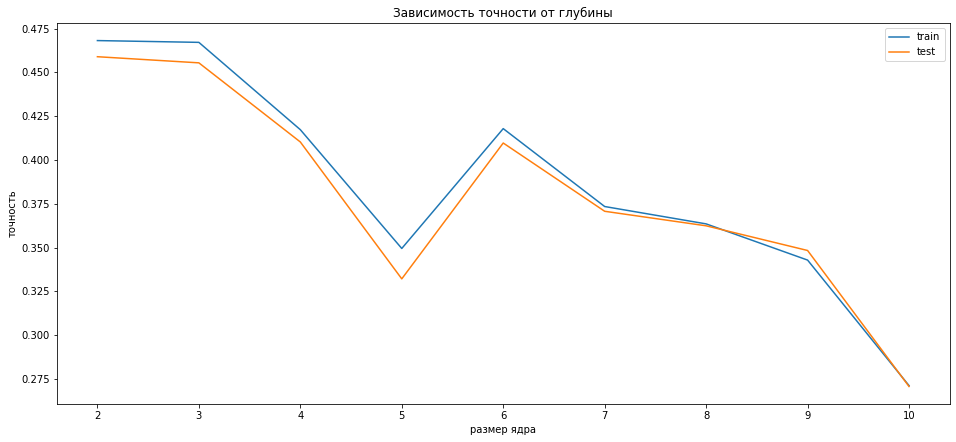

In [14]:
# acc = sorted(acc, key=itemgetter(3), reverse=True) 
# print(acc[0],"\n", acc[1],"\n",acc[2], "\n",acc[3])

acnn = np.array(acc)
plt.figure(figsize=(16,7))
plt.plot(acnn[:,0], acnn[:,1],'-',label = 'train')
plt.plot(acnn[:,0], acnn[:,2],'-',label = 'test')

plt.legend()
plt.title('Зависимость точности от глубины')
plt.xlabel('размер ядра')
plt.ylabel('точность')
plt.show()

Видим что чем меньше ядро, тем точноcть лучше, возьмем ядро с размером 2х2

In [15]:
# определяем зависимость точности от количетства нитей
n_neurons = 32
n_threads = [1,2,3,4,5,6,7,8,9,10]
n_layers = 3
pool_kernel = 2
strade = 2
epochs = 5
kernel_size = 2
acc = []
for nt in tqdm(n_threads):
    model, acc_train, acc_test, hist = concat_nn(x_train, y_train, x_test, y_test, n_neurons, kernel_size,
                                             nt, n_layers, pool_kernel, strade, epochs)
    acc.append([nt, acc_train, acc_test])

100%|██████████| 10/10 [20:08<00:00, 120.85s/it]


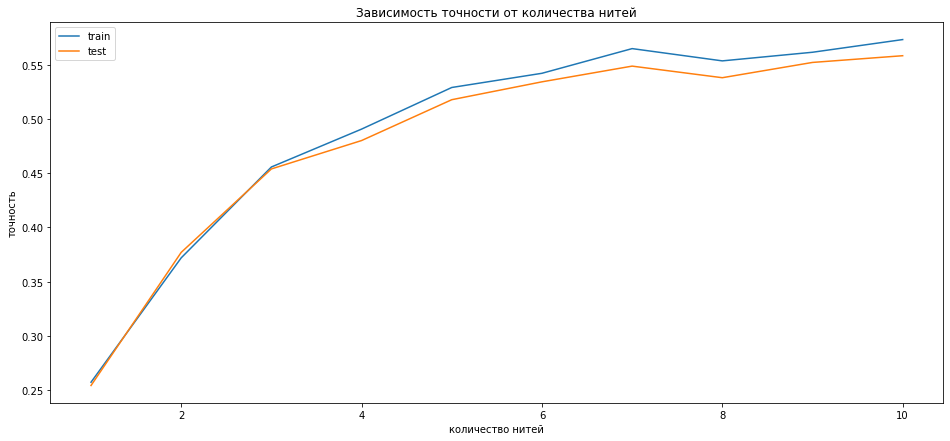

In [16]:
acnn = np.array(acc)
plt.figure(figsize=(16,7))
plt.plot(acnn[:,0], acnn[:,1],'-',label = 'train')
plt.plot(acnn[:,0], acnn[:,2],'-',label = 'test')

plt.legend()
plt.title('Зависимость точности от количества нитей')
plt.xlabel('количество нитей')
plt.ylabel('точность')
plt.show()

В целом, чем больше нитей, то точность растет. В данном конкретном случае опимальное количество нитей 10

In [17]:
# определяем зависимость точности от количетства нейронов в слое
n_neurons = [16,32,64,128]
n_threads = 10
n_layers = 3
pool_kernel = 2
strade = 2
epochs = 5
kernel_size = 2
acc = []
for nn in tqdm(n_neurons):
    model, acc_train, acc_test, hist = concat_nn(x_train, y_train, x_test, y_test, nn, kernel_size,
                                             n_threads, n_layers, pool_kernel, strade, epochs)
    acc.append([nn, acc_train, acc_test])

100%|██████████| 6/6 [1:57:06<00:00, 1171.05s/it]


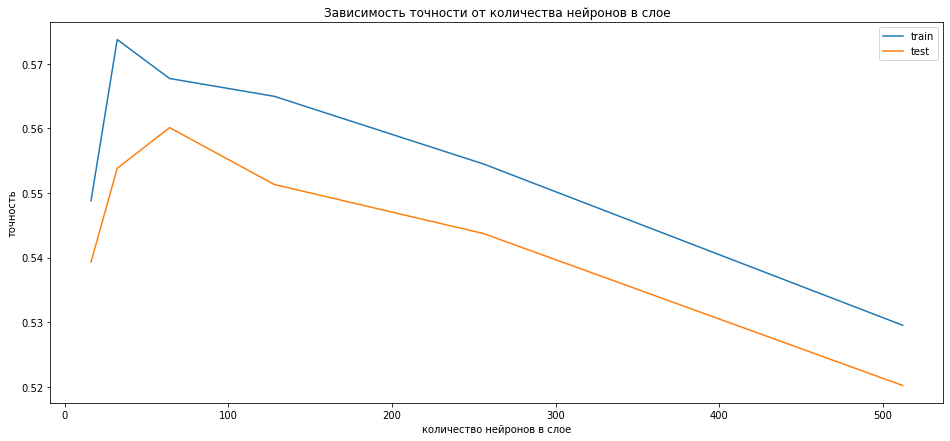

In [18]:
acnn = np.array(acc)
plt.figure(figsize=(16,7))
plt.plot(acnn[:,0], acnn[:,1],'-',label = 'train')
plt.plot(acnn[:,0], acnn[:,2],'-',label = 'test')

plt.legend()
plt.title('Зависимость точности от количества нейронов в слое')
plt.xlabel('количество нейронов в слое')
plt.ylabel('точность')
plt.show()

Видим, что самое лучшее количество нейронов 64

#### Оценить рост точности при увеличении глубины сети (больше слоев)

In [19]:
# определяем зависимость точности от количетства нейронов в слое
n_neurons = 32
n_threads = 10
n_layers = [1,2,3,4,5,6,7,8,9,10]
pool_kernel = 2
strade = 2
epochs = 5
kernel_size = 2
acc = []
for lrs in tqdm(n_layers):
    model, acc_train, acc_test, hist = concat_nn(x_train, y_train, x_test, y_test, n_neurons, kernel_size,
                                             n_threads, lrs, pool_kernel, strade, epochs)
    acc.append([lrs, acc_train, acc_test])

100%|██████████| 10/10 [37:52<00:00, 227.21s/it]


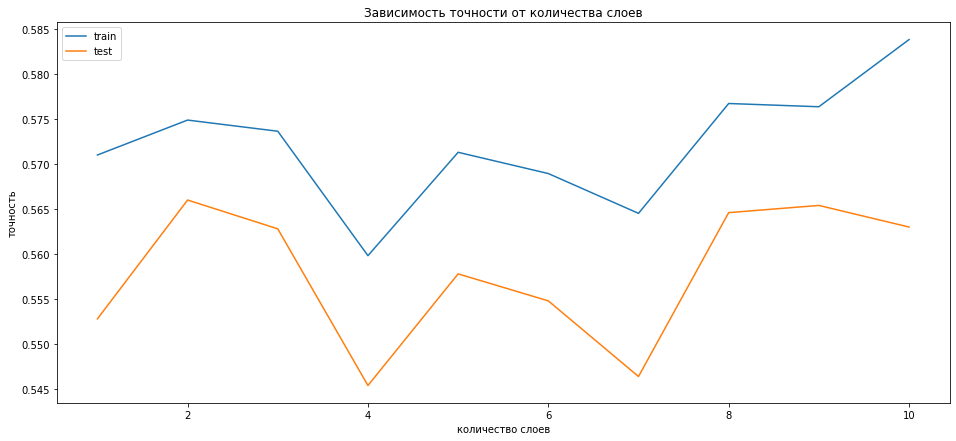

In [20]:
acnn = np.array(acc)
plt.figure(figsize=(16,7))
plt.plot(acnn[:,0], acnn[:,1],'-',label = 'train')
plt.plot(acnn[:,0], acnn[:,2],'-',label = 'test')

plt.legend()
plt.title('Зависимость точности от количества слоев')
plt.xlabel('количество слоев')
plt.ylabel('точность')
plt.show()

Есть некая периодическая зависимость точности от количества слоев. Похоже на интерференцию точности в зависимости от собственой частоты сети))) Возьмем количество слоев 2 гденаблюдается такая же точность как и при количестве слоев 8. 
Финализируем точность модели с учетом самых лучших параметров и количества эпох 50

In [13]:
n_neurons = 64
n_threads = 10
n_layers = 2
pool_kernel = 2
strade = 2
epochs = 50
kernel_size = 2
model, acc_train, acc_test, hist = concat_nn(x_train, y_train, x_test, y_test, n_neurons, kernel_size,
                                             n_threads, n_layers, pool_kernel, strade, epochs)

In [15]:
 print(f'accuracy на трейне: {acc_train}, accuracy на тесте {acc_test}')

accuracy на трейне: 0.56454, accuracy на тесте 0.5535
